Projeto: Brothers of Metal

Objetivo: Analisar, utilizando um dataset, a quantidade de bandas de Heavy Metal e obter a quantidade de bandas criadas por país neste gênero. Através da análise dos dados, será possível auxiliar bandas, em início de carreira, onde procurar inspirações e divulgar seu trabalho.

“Quais são os países que mais possuem bandas de Heavy Metal? “
“Onde posso procurar material para inspiração e divulgação de uma banda em início de carreira?”

Heavy metal (ou simplesmente metal) é um gênero do rock que se desenvolveu no final da década de 1960 e no início da década de 1970, em grande parte no Reino Unido e nos Estados Unidos. Tendo como raízes o blues-rock e o rock psicodélico (psicadélico, em português europeu), as bandas que criaram o heavy metal desenvolveram um som massivo e encorpado, caracterizado por um timbre saturado e distorcido dos amplificadores, pelas cordas graves da guitarra para a criação de riffs e pela exploração de sonoridades em tons menores, dando um ar sombrio às composições.

Fun fact 1: Sepultura utilizou essa linha de pensamento em 1984 para o desenvolvimento da banda. Foi considerada uma das maiores bandas de Thrash Metal de todos os tempos. Thrash metal é um subgênero do heavy metal caracterizado por seu ritmo rápido e agressividade.
Fun fact 2: Metal é uma própria ramificação do gênero Rock.

Observações: O dataset utilizado é de um site da Estônia, isso leva um enviesamento em relação aos dados obtidos.

Conclusão: Com base na análise de dados realizada, verificou-se que grande parte do material de Heavy Metal se encontra nos EUA e que países com populações menores, a relação de bandas por habitantes também podem ser muito atrativas para divulgação de uma banda nessas regiões.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Visualizing the data set
dataset = pd.read_csv('C:\\Users\\nilso\\Documents\\git-ws\\projeto-01\\data\\metal_bands_2017.csv', encoding='cp1250')
dataset

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [3]:
# Checking if have NaN
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Unnamed: 0    5000 non-null int64
band_name     5000 non-null object
fans          5000 non-null int64
formed        5000 non-null object
origin        4992 non-null object
split         5000 non-null object
style         5000 non-null object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [4]:
# Viewing NaN data
dataset[dataset['origin'].isnull()]

,Unnamed: 0,band_name,fans,formed,origin,split,style
460,460,Enshine,175,2009,NaN,-,Gothic doom
989,989,Clouds,61,2013,NaN,2013,Atmospheric doom
1422,1422,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2614,2614,Twilight Of The Gods,11,2010,NaN,-,Heavy
2996,2996,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3444,3444,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3941,3941,Level 10,3,2014,NaN,2014,"Heavy,Power"
4201,4201,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


In [5]:
# I must handle the data for the 'origin'
dataset['origin'].fillna('Undefined', inplace=True)

In [6]:
# Making pure style column, choosing the first style as default
# I choose the first style, for cleaning, because makes more sense, in my opinion, 
# analyze the origin of the band through it
pure_style = [ (lambda style: style[0])(style.split(','))  for style in dataset['style']]
dataset['pure_style'] = pure_style

In [7]:
# Cleaning origin -- Here i have a problem with origin: 'Tunisia, France' and others mixed origins
# I decided to use the first country for my analyzes
dataset['origin'].unique()

array(['United Kingdom', 'Sweden', 'USA', 'Finland', 'Germany', 'Poland',
       'Norway', 'The Netherlands', 'Switzerland', 'France', 'Brazil',
       'Portugal', 'Australia', 'Greece', 'Italy', 'United Kingdom, USA',
       'Austria', 'Canada', 'Israel', 'Denmark, USA', 'Ireland',
       'Faroe Islands', 'Denmark', 'Russia', 'Ukraine', 'Spain',
       'Israel, The Netherlands', 'Iceland', 'Andorra', 'Tunisia, France',
       'Belgium', 'Romania', 'Chile', 'Japan', 'Colombia, USA', 'Taiwan',
       'Hungary, United Kingdom', 'Undefined', 'Hungary', 'New Zealand',
       'Greece, Sweden', 'Sweden, Finland', 'Australia, United Kingdom',
       'Estonia', 'Jordan', 'Latvia', 'Slovenia', 'Iran', 'Mexico',
       'Argentina', 'Turkey', 'UAE', 'Liechtenstein', 'Czech Republic',
       'Norway, Finland', 'Serbia', 'Belgium, United Kingdom', 'Egypt',
       'Russia, Canada', 'Indonesia', 'Iraq, USA', 'Lithuania', 'China',
       'India', 'Slovak Republic', 'Kyrgyzstan, Germany', 'Singapore',


In [8]:
pure_origin = [(lambda origin: origin[0])(origin.split(','))  for origin in dataset['origin']]
dataset['pure_origin'] = pure_origin

In [9]:
# New Dataframe with ['band_name','pure style', 'origin']
df = pd.DataFrame(dataset[['band_name','pure_style', 'pure_origin']])
df

,band_name,pure_style,pure_origin
0,Iron Maiden,New wave of british heavy,United Kingdom
1,Opeth,Extreme progressive,Sweden
2,Metallica,Heavy,USA
3,Megadeth,Thrash,USA
4,Amon Amarth,Melodic death,Sweden
...,...,...,...
4995,Atara,Black,France
4996,Avicularia,Avantgarde death,Croatia
4997,Awake,Heavy,United Kingdom
4998,Axatak,Hard rock,Australia


In [10]:
# Constructing a Panda Series through Dataframe 'df' and sorting descending, whith that i can get the top ten
# styles of heavy metal

# df['pure style'].value_counts() == ((df.groupby('pure style')['band_name'].count(), ascending=False))

styles = pd.Series.sort_values(df['pure_style'].value_counts(), ascending=False)
pd.DataFrame(styles).head(10)

,pure_style
Black,591
Death,432
Heavy,348
Progressive,247
Doom,229
Power,218
Melodic death,207
Thrash,187
Atmospheric black,115
Gothic,114


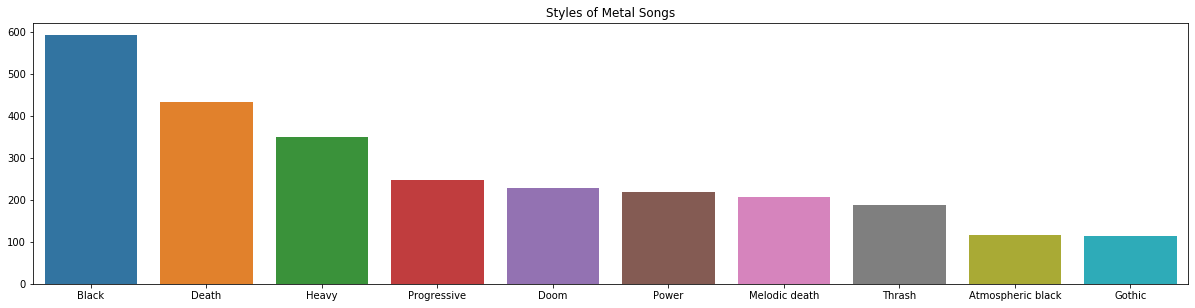

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20.7, 4.8)
plt.title('Styles of Metal Songs')
sns.barplot(x=styles[:10].keys(), y=styles[:10].values);

In [12]:
# Creating index and columns names for a new dataframe

index = [ index for index in df['pure_style'].unique()]
col_names = [ col for col in df['pure_origin'].unique()]

# creating an empty dataframe 
df_qty_country = pd.DataFrame(index=index, columns=col_names)

# Updating dataframe to see the contribution of each country to the styles of metal music
for name in col_names:
    df_qty_country[name] = df[df['pure_origin'] == name]['pure_style'].value_counts()
    
df_qty_country.fillna(0, inplace=True)
df_qty_country.head(10)

,United Kingdom,Sweden,USA,Finland,Germany,Poland,Norway,The Netherlands,Switzerland,France,...,Bolivia,Sri Lanka,Armenia,Azerbaijan,Ecuador,Albania,Jersey,Swaziland,Venezuela,Greenland
New wave of british heavy,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extreme progressive,1.0,5.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heavy,31.0,41.0,91.0,10.0,38.0,6.0,6.0,1.0,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Thrash,8.0,9.0,55.0,9.0,17.0,2.0,7.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Melodic death,7.0,43.0,26.0,32.0,9.0,2.0,2.0,6.0,1.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Progressive death,1.0,3.0,13.0,1.0,4.0,0.0,2.0,2.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Progressive,14.0,12.0,73.0,10.0,15.0,6.0,9.0,11.0,1.0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Doom,32.0,18.0,73.0,16.0,8.0,0.0,8.0,5.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Symphonic power,1.0,2.0,6.0,6.0,2.0,1.0,1.0,1.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extreme power,0.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Top 10 styles --> same as above but with only top 10 styles
top_styles = [name for name in styles.index[:10]]
df_top = pd.DataFrame(index=top_styles,columns= col_names)
for name in col_names:
    df_top[name] = df[df['pure_origin'] == name]['pure_style'].value_counts()
df_top.fillna(0, inplace=True)
df_top.head(10)

,United Kingdom,Sweden,USA,Finland,Germany,Poland,Norway,The Netherlands,Switzerland,France,...,Bolivia,Sri Lanka,Armenia,Azerbaijan,Ecuador,Albania,Jersey,Swaziland,Venezuela,Greenland
Black,27,63,74,25,52,27.0,73,15,7.0,39,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Death,20,86,91,24,22,12.0,17,25,1.0,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heavy,31,41,91,10,38,6.0,6,1,6.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Progressive,14,12,73,10,15,6.0,9,11,1.0,12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Doom,32,18,73,16,8,0.0,8,5,2.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Power,7,30,18,23,41,0.0,3,2,2.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Melodic death,7,43,26,32,9,2.0,2,6,1.0,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thrash,8,9,55,9,17,2.0,7,6,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atmospheric black,14,6,23,2,7,2.0,2,6,1.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gothic,6,8,4,14,14,4.0,7,9,0.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Total bands per country ( TOP 10 styles)
bands_sum = pd.Series([ df_top[name].sum()for name in col_names])
df_totalBands = pd.DataFrame()
df_totalBands['Bands'] = col_names
df_totalBands['Total'] = bands_sum
# Sorting descending
df_totalBands.sort_values(['Total'], ascending=False, inplace=True)
# Removing countries with 0 metal bands
df_totalBands.replace({'0':np.nan, 0:np.nan}, inplace=True)
df_totalBands.dropna(inplace=True)
df_totalBands.head(10)

,Bands,Total
2,USA,528.0
1,Sweden,316.0
4,Germany,223.0
0,United Kingdom,166.0
3,Finland,165.0
6,Norway,134.0
14,Italy,131.0
9,France,106.0
7,The Netherlands,86.0
16,Canada,81.0


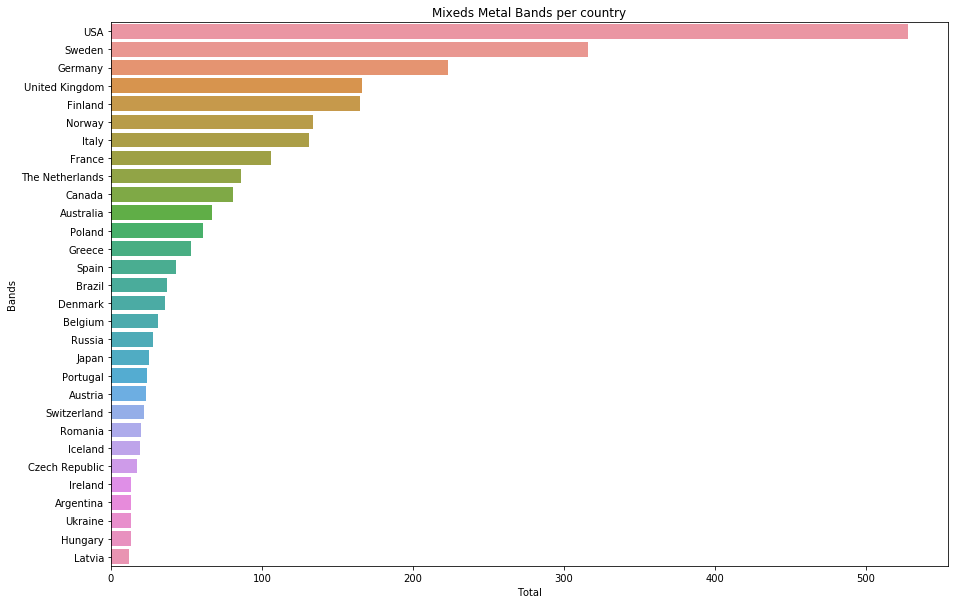

In [15]:
# Bands per country
total = pd.Series(df_totalBands['Total'])
bands = pd.Series(df_totalBands['Bands'])
              
fig, ax = plt.subplots()
fig.set_size_inches(15.0, 10.0)
plt.title('Mixeds Metal Bands per country')
sns.barplot(x=total[:30], y=bands[:30]);

In [16]:
# Merging Top 10 styles + Bands per country
# Preparing DataFrame
countries = [ col for col in df_totalBands['Bands']]
df_totalBands.set_index('Bands',inplace=True)
for style in top_styles:
    df_totalBands[style] = 0

In [17]:
# View new dataframe
for style in top_styles:
    for country in countries:
        df_totalBands.at[country,style] = df_top.at[style,country]
df_totalBands.reset_index(level=0, inplace=True)
df_totalBands.head(20)

,Bands,Total,Black,Death,Heavy,Progressive,Doom,Power,Melodic death,Thrash,Atmospheric black,Gothic
0,USA,528.0,74,91,91,73,73,18,26,55,23,4
1,Sweden,316.0,63,86,41,12,18,30,43,9,6,8
2,Germany,223.0,52,22,38,15,8,41,9,17,7,14
3,United Kingdom,166.0,27,20,31,14,32,7,7,8,14,6
4,Finland,165.0,25,24,10,10,16,23,32,9,2,14
5,Norway,134.0,73,17,6,9,8,3,2,7,2,7
6,Italy,131.0,20,7,19,15,11,21,14,6,8,10
7,France,106.0,39,16,8,12,8,3,7,1,7,5
8,The Netherlands,86.0,15,25,1,11,5,2,6,6,6,9
9,Canada,81.0,15,10,10,10,4,5,10,11,4,2


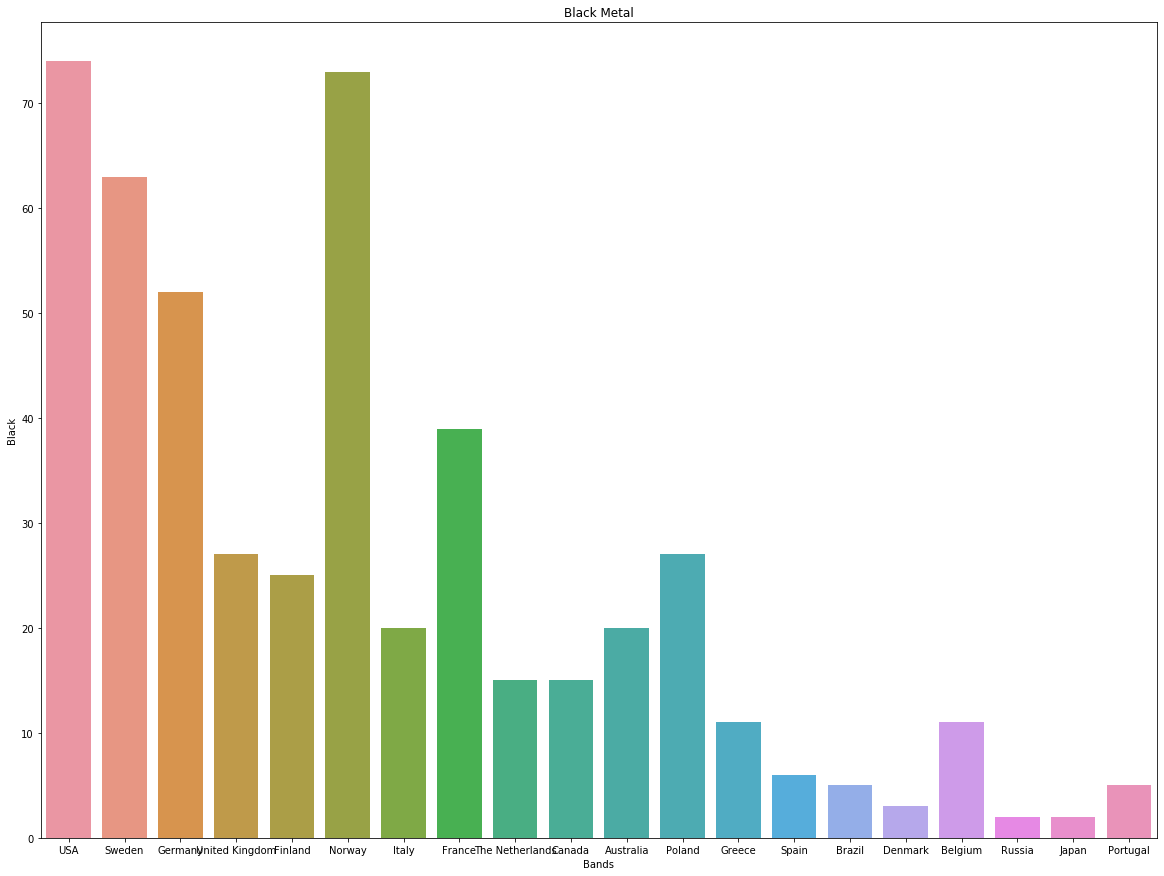

In [18]:
# Black Metal Results
genre = pd.Series(df_totalBands['Black'])
nation = pd.Series(df_totalBands['Bands'])            
fig, ax = plt.subplots()
fig.set_size_inches(20.0, 15.0)
plt.title('Black Metal')
sns.barplot(x=nation[:20], y=genre);

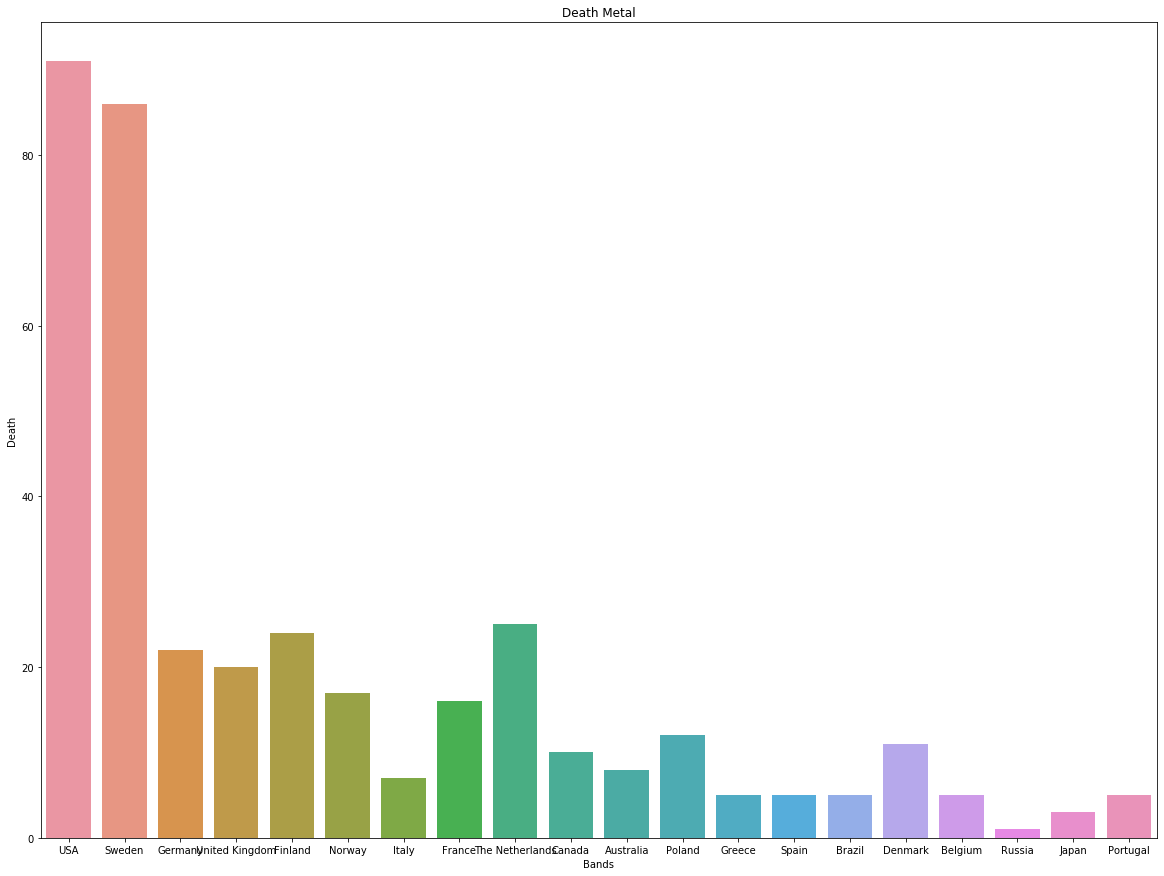

In [19]:
# Death Metal Results
genre = pd.Series(df_totalBands['Death'])
nation = pd.Series(df_totalBands['Bands'])            
fig, ax = plt.subplots()
fig.set_size_inches(20.0, 15.0)
plt.title('Death Metal')
sns.barplot(x=nation[:20], y=genre);

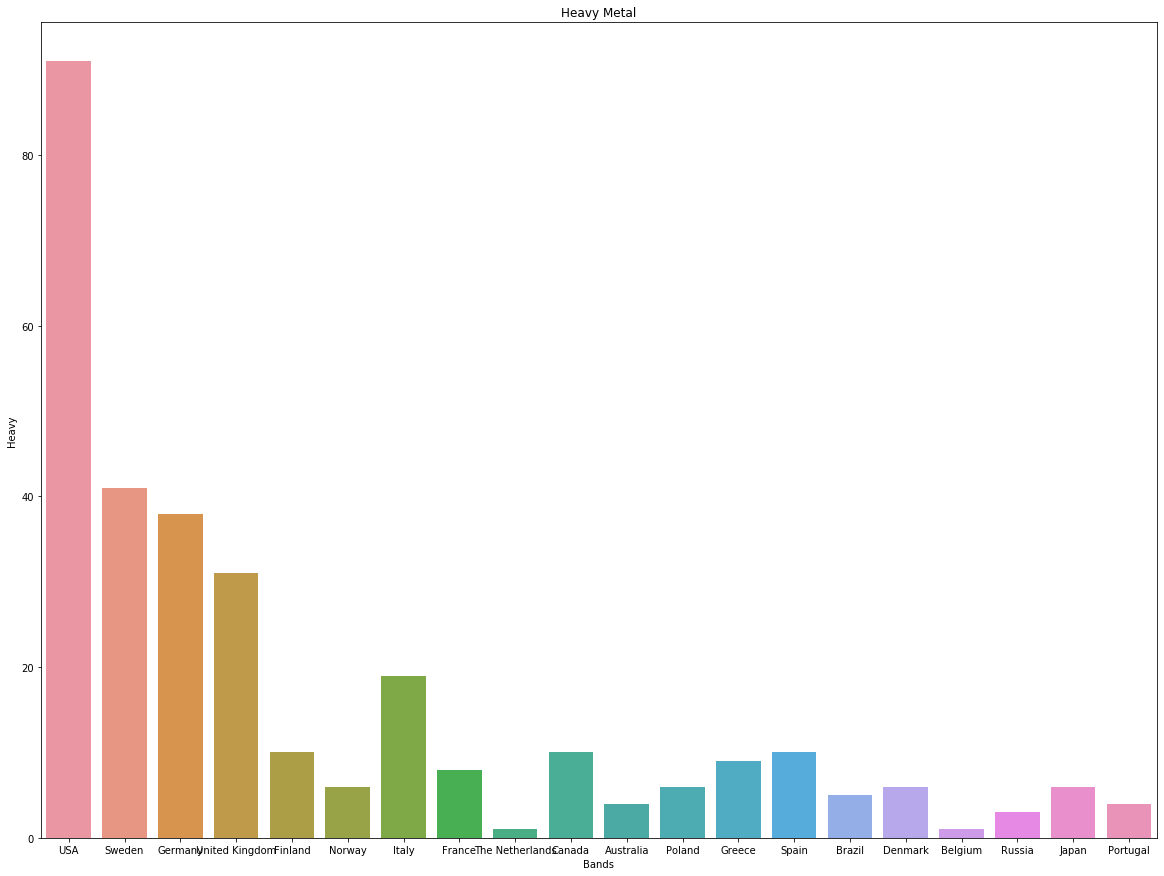

In [20]:
# Heavy Metal Results
genre = pd.Series(df_totalBands['Heavy'])
nation = pd.Series(df_totalBands['Bands'])            
fig, ax = plt.subplots()
fig.set_size_inches(20.0, 15.0)
plt.title('Heavy Metal')
sns.barplot(x=nation[:20], y=genre);